# Vibration Analysis Notebook
In this notebook we will be plotting and dicussing the Power Spectrum Density (PSD) plots made by LabView using the TableStable Vibration Analyser VA-2.

In [1]:
## Make sure inline plots is on.
%matplotlib inline

## First import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt

## Set the figsize for the notebook.
mplt.rcParams['figure.figsize']=[12.0, 8.0]

In [2]:
## Begin with file location
dstr = r'C:\Users\Fergus\Desktop\Vibration'
bstr = r'Z:\GroupMembers\Fergus\Thesis\Vibration'
## Add generic filename
m = r'\Multiplex_acceleration_'
t = r'\426_TIRF_acceleration_'
c = r'\Confocal_acceleration_'
m1 = r'\MAG1_acceleration_'
m2 = r'\MAG2accurion_acceleration_'
m3 = r'\MAG3_acceleration_'
## Add axes to filenames
v = r'z_'
h1 = r'h1_'
h2 = r'h2_'
## And finally location
F = r'floor'
P = r'pump'
T = r'table'
T2 = r'tableoff'

## Where are the files?
strt = dstr

In [3]:
## Next import the data and sort it by Frequency.
## v == z; h1 == towards the wall (table short axis); h2 == lengthways along table
## F == on the floor (actually on the legs of the table); P == on table with pump on; T == on table
mvF = pd.read_table(strt + m + v + F).set_index("Frequency (Hz)")
mh1F = pd.read_table(strt + m + h1 + F).set_index("Frequency (Hz)")
mh2F = pd.read_table(strt + m + h2 + F).set_index("Frequency (Hz)")
mvP = pd.read_table(strt + m + v + P).set_index("Frequency (Hz)")
mh1P = pd.read_table(strt + m + h1 + P).set_index("Frequency (Hz)")
mh2P = pd.read_table(strt + m + h2 + P).set_index("Frequency (Hz)")
mvT = pd.read_table(strt + m + v + T).set_index("Frequency (Hz)")
mh1T = pd.read_table(strt + m + h1 + T).set_index("Frequency (Hz)")
mh2T = pd.read_table(strt + m + h2 + T).set_index("Frequency (Hz)")

## and old data from eric:
tvF = pd.read_table(strt + t + v + F).set_index("Frequency (Hz)")
tvT = pd.read_table(strt + t + v + T).set_index("Frequency (Hz)")
tvT2 = pd.read_table(strt + t + v + T2).set_index("Frequency (Hz)")
cvF = pd.read_table(strt + t + v + F).set_index("Frequency (Hz)")
cvT = pd.read_table(strt + t + v + T).set_index("Frequency (Hz)")
cvT2 = pd.read_table(strt + t + v + T2).set_index("Frequency (Hz)")
m1vF = pd.read_table(strt + m1 + v + F).set_index("Frequency (Hz)")
m1vT = pd.read_table(strt + m1 + v + T).set_index("Frequency (Hz)")
m1vT2 = pd.read_table(strt + m1 + v + T2).set_index("Frequency (Hz)")
m2vF = pd.read_table(strt + m2 + v + F).set_index("Frequency (Hz)")
m2vT = pd.read_table(strt + m2 + v + T).set_index("Frequency (Hz)")
m2vT2 = pd.read_table(strt + m2 + v + T2).set_index("Frequency (Hz)")
m3vF = pd.read_table(strt + m3 + v + F).set_index("Frequency (Hz)")
m3vT = pd.read_table(strt + m3 + v + T).set_index("Frequency (Hz)")
m3vT2 = pd.read_table(strt + m3 + v + T2).set_index("Frequency (Hz)")

As you can see below, these datasets are simply the output of the oscillators in the vibration analyser: the voltage is then squared, as the square of the signal would always be proportional to the actual power (with some specific impedance, through $P = \frac{V^2}{R}$).

In [4]:
tvF.axes[1]

Index(['PSD (Vrms^2/Hz)', 'PSD Hanning window  (Vrms^2/Hz)'], dtype='object')

The 'Hanning Window' is an apodization function used to reduce spectral leakage. From WolframMathWorld:

"Leakage, more explicitly called spectral leakage, is a smearing of power across a frequency spectrum that occurs when the signal being measured is not periodic in the sample interval. It occurs because discrete sampling results in the effective computation of a Fourier series of a waveform having discontinuities, which result in additional frequency components. Leakage is the most common error encountered in digital signal processing, and while its effects cannot be entirely eliminated, they may sometimes be reduced with the aid of a suitable apodization function."

## PSDs on the floor

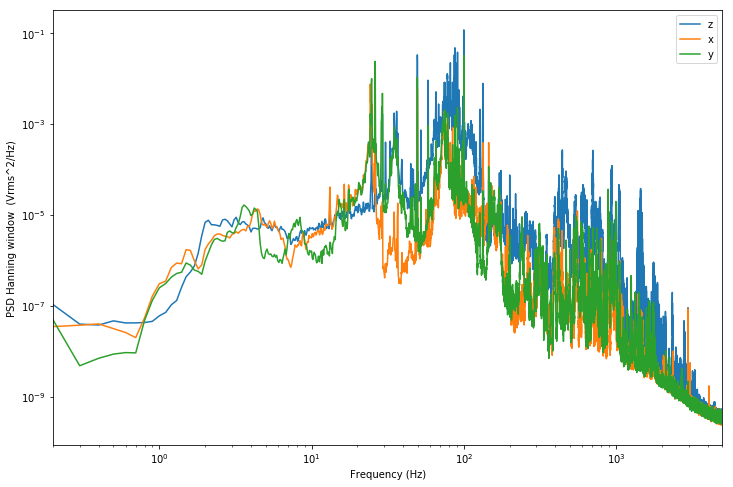

In [5]:
plt.figure()

mvF.iloc[1:,1].plot(loglog='True', label='z')
mh1F.iloc[1:,1].plot(loglog='True', label='x')
mh2F.iloc[1:,1].plot(loglog='True', label='y')

plt.ylabel('PSD Hanning window  (Vrms^2/Hz)')
plt.legend()

## PSDs on the table with the pump

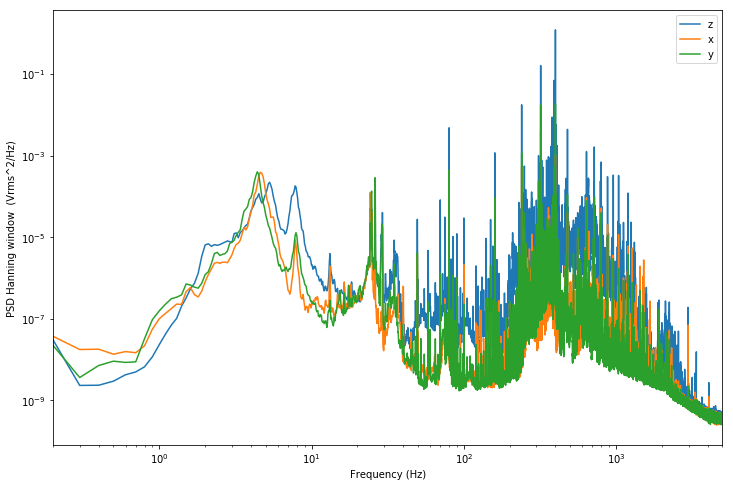

In [6]:
plt.figure()

mvP.iloc[1:,1].plot(loglog='True', label='z')
mh1P.iloc[1:,1].plot(loglog='True', label='x')
mh2P.iloc[1:,1].plot(loglog='True', label='y')

plt.ylabel('PSD Hanning window  (Vrms^2/Hz)')
plt.legend()

## PSDs on the table without the pump

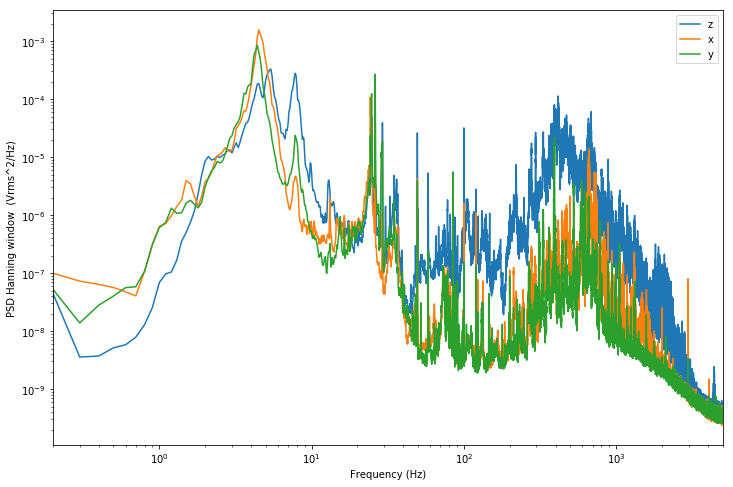

In [7]:
plt.figure()

mvT.iloc[1:,1].plot(loglog='True', label='z')
mh1T.iloc[1:,1].plot(loglog='True', label='x')
mh2T.iloc[1:,1].plot(loglog='True', label='y')

plt.ylabel('PSD Hanning window  (Vrms^2/Hz)')
plt.legend()

## Combined PSDs

In [8]:
## Create combined datasets
alF = mvF.add(mh1F.add(mh2F))
alT = mvT.add(mh1T.add(mh2T))
alP = mvP.add(mh1P.add(mh2P))

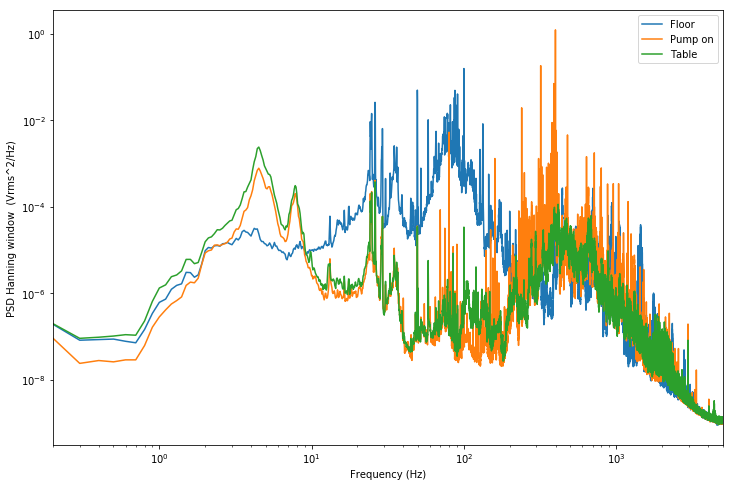

In [9]:
plt. figure()

alF.iloc[1:,1].plot(loglog='True', label='Floor')
alP.iloc[1:,1].plot(loglog='True', label='Pump on')
alT.iloc[1:,1].plot(loglog='True', label='Table')

plt.ylabel('PSD Hanning window  (Vrms^2/Hz)')
plt.legend()

## Z PSDs

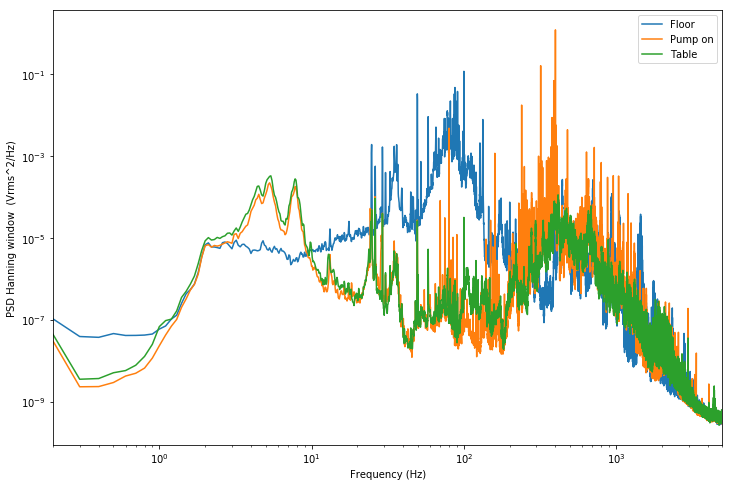

In [10]:
plt.figure()

mvF.iloc[1:,1].plot(loglog='True', label='Floor')
mvP.iloc[1:,1].plot(loglog='True', label='Pump on')
mvT.iloc[1:,1].plot(loglog='True', label='Table')

plt.ylabel('PSD Hanning window  (Vrms^2/Hz)')
plt.legend()

## Comparison with other tables: vertical vibrations

### Sanity check: Floor

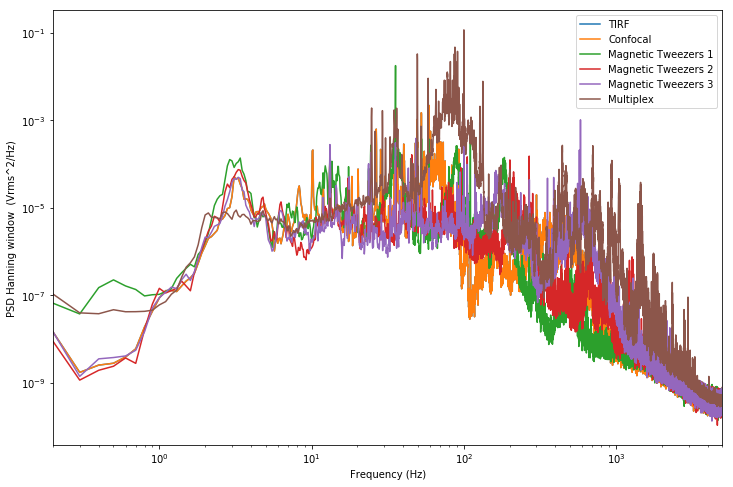

In [11]:
plt. figure()

tvF.iloc[1:,1].plot(loglog='True', label='TIRF')
cvF.iloc[1:,1].plot(loglog='True', label='Confocal')
m1vF.iloc[1:,1].plot(loglog='True', label='Magnetic Tweezers 1')
m2vF.iloc[1:,1].plot(loglog='True', label='Magnetic Tweezers 2')
m3vF.iloc[1:,1].plot(loglog='True', label='Magnetic Tweezers 3')
mvF.iloc[1:,1].plot(loglog='True', label='Multiplex')

plt.ylabel('PSD Hanning window  (Vrms^2/Hz)')
plt.legend()

### The Results: On Table

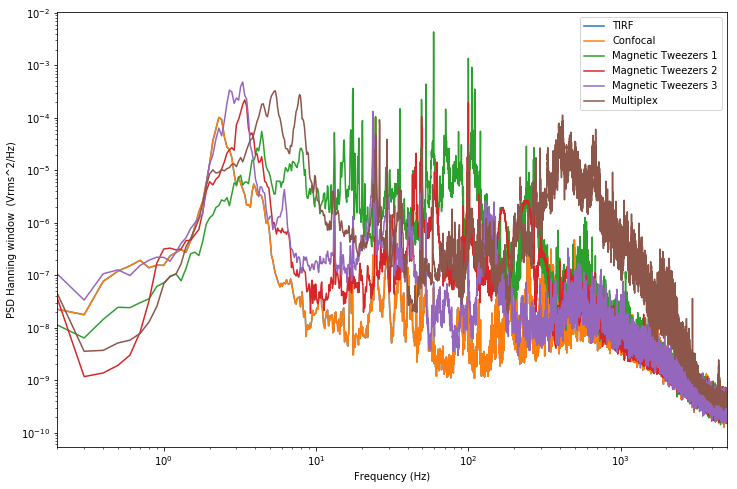

In [12]:
plt. figure()

tvT.iloc[1:,1].plot(loglog='True', label='TIRF')
cvT.iloc[1:,1].plot(loglog='True', label='Confocal')
m1vT.iloc[1:,1].plot(loglog='True', label='Magnetic Tweezers 1')
m2vT.iloc[1:,1].plot(loglog='True', label='Magnetic Tweezers 2')
m3vT.iloc[1:,1].plot(loglog='True', label='Magnetic Tweezers 3')
mvT.iloc[1:,1].plot(loglog='True', label='Multiplex')

plt.ylabel('PSD Hanning window  (Vrms^2/Hz)')
plt.legend()

### Comparing the two

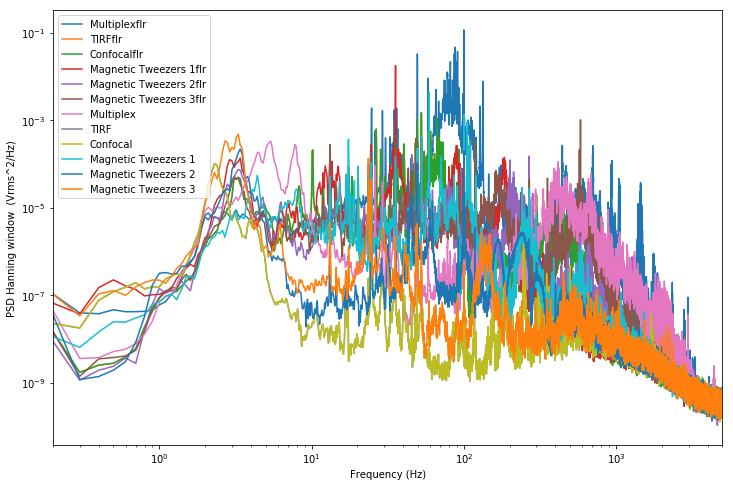

In [13]:
plt. figure()

mvF.iloc[1:,1].plot(loglog='True', label='Multiplexflr')
tvF.iloc[1:,1].plot(loglog='True', label='TIRFflr')
cvF.iloc[1:,1].plot(loglog='True', label='Confocalflr')
m1vF.iloc[1:,1].plot(loglog='True', label='Magnetic Tweezers 1flr')
m2vF.iloc[1:,1].plot(loglog='True', label='Magnetic Tweezers 2flr')
m3vF.iloc[1:,1].plot(loglog='True', label='Magnetic Tweezers 3flr')
mvT.iloc[1:,1].plot(loglog='True', label='Multiplex')
tvT.iloc[1:,1].plot(loglog='True', label='TIRF')
cvT.iloc[1:,1].plot(loglog='True', label='Confocal')
m1vT.iloc[1:,1].plot(loglog='True', label='Magnetic Tweezers 1')
m2vT.iloc[1:,1].plot(loglog='True', label='Magnetic Tweezers 2')
m3vT.iloc[1:,1].plot(loglog='True', label='Magnetic Tweezers 3')

plt.ylabel('PSD Hanning window  (Vrms^2/Hz)')
plt.legend()

### Addendum: the data for the confocal and the TIRF setups are identical!

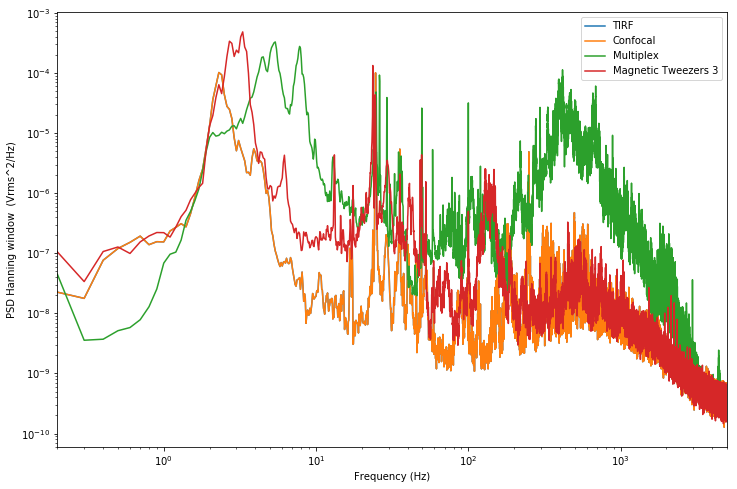

In [14]:
plt. figure()

tvT.iloc[1:,1].plot(loglog='True', label='TIRF')
cvT.iloc[1:,1].plot(loglog='True', label='Confocal')
mvT.iloc[1:,1].plot(loglog='True', label='Multiplex')
m3vT.iloc[1:,1].plot(loglog='True', label='Magnetic Tweezers 3')

plt.ylabel('PSD Hanning window  (Vrms^2/Hz)')
plt.legend()

In [ ]:
all_concat = pd.concat((alF, alP, alT))

by_row_index = all_concat.groupby(all_concat.index)
all_means = by_row_index.mean()

diffF = alF.subtract(all_means)
diffP = alP.subtract(all_means)
diffT = alT.subtract(all_means)

plt. figure()

diffF.iloc[1:,1].plot(loglog='True', label='Floor')
diffP.iloc[1:,1].plot(loglog='True', label='Pump on')
diffT.iloc[1:,1].plot(loglog='True', label='Table')
all_means.iloc[1:,1].plot(loglog='True', label='Means')

plt.legend()